## Modeling

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#read data from previous part
df = pd.read_csv('data_eda.csv')

In [16]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,total_grades,total_grade_avg
0,0,0,1,18,1,1,0,4,4,0,...,4,1,1,3,6,5,6,6,17,5.666667
1,1,0,1,17,1,1,1,1,1,0,...,3,1,1,3,4,5,5,6,16,5.333333
2,2,0,1,15,1,0,1,1,1,0,...,2,2,3,3,10,7,8,10,25,8.333333
3,3,0,1,15,1,1,1,4,2,1,...,2,1,1,5,2,15,14,15,44,14.666667
4,4,0,1,16,1,1,1,3,3,2,...,2,1,2,5,4,6,10,10,26,8.666667


In [17]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'total_grades', 'total_grade_avg'],
      dtype='object')

In [61]:
#Choose relevant columns
df_model = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3',
       'total_grades', 'total_grade_avg']]

In [62]:
#Get dummy data
df_dum = pd.get_dummies(df_model)

In [63]:
#train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('total_grade_avg', axis = 1)
y = df_dum.total_grade_avg.values

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [64]:
#multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.803e+30
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:17:47   Log-Likelihood:                 12210.
No. Observations:                 395   AIC:                        -2.435e+04
Df Residuals:                     361   BIC:                        -2.422e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.441e-15   9.93e-15     -0.447      0.655    -2.4e-14    1.51e-14
school       -5.301e-15    1.8e-15     -2.953      0.003   -8.83e-15   -1.77e-15
sex            1.11e-16   1.15e-15      0.096      0.923   -2.16e-15    2.38e-15
age           6.384e-16   4.86e-16      1.314      0.190   -3.17e-16    1.59e-15
address        1.11e-15   1.34e-15      0.831      0.406   -1.52e-15    3.74e-15
famsize       2.845e-15   1.12e-15      2.537      0.012     6.4e-16    5.05e-15
Pstatus      -5.329e-15   1.65e-15     -3.220      0.001   -8.58e-15   -2.07e-15
Medu          1.388e-15   6.56e-16      2.115      0.035    9.72e-17    2.68e-15
Fedu          4.441e-16   6.09e-16      0.730      0.466   -7.53e-16    1.64e-15
Mjob         -6.661e-16   4.71e-16     -1.413      0.158   -1.59e-15    2.61e-16
Fjob          1.221e-15   5.95e-16      2.053      0.041    5.15e-17    2.39e-15
reason                0   4.19e-16          0      1.000   -8.24e-16    8.24e-16
guardian     -3.886e-16   8.59e-16     -0.452      0.651   -2.08e-15     1.3e-15
traveltime    9.437e-16   7.79e-16      1.212      0.226   -5.88e-16    2.47e-15
studytime    -4.163e-16    6.6e-16     -0.630      0.529   -1.72e-15    8.83e-16
failures     -7.216e-16   7.78e-16     -0.928      0.354   -2.25e-15    8.08e-16
schoolsup     3.775e-15   1.58e-15      2.390      0.017    6.69e-16    6.88e-15
famsup       -5.551e-16   1.11e-15     -0.500      0.617   -2.74e-15    1.63e-15
paid          -2.22e-16   1.09e-15     -0.204      0.839   -2.37e-15    1.92e-15
activities    1.388e-16   1.02e-15      0.136      0.892   -1.87e-15    2.15e-15
nursery      -8.882e-16   1.26e-15     -0.706      0.480   -3.36e-15    1.58e-15
higher        1.221e-15   2.46e-15      0.497      0.619   -3.61e-15    6.05e-15
internet     -2.665e-15   1.41e-15     -1.887      0.060   -5.44e-15    1.13e-16
romantic     -4.441e-16   1.09e-15     -0.408      0.684   -2.59e-15     1.7e-15
famrel       -4.441e-16    5.7e-16     -0.780      0.436   -1.56e-15    6.76e-16
freetime      5.551e-17   5.44e-16      0.102      0.919   -1.01e-15    1.12e-15
goout        -2.776e-17   5.22e-16     -0.053      0.958   -1.05e-15    9.98e-16
Dalc          4.441e-16   7.42e-16      0.598      0.550   -1.02e-15     1.9e-15
Walc         -3.331e-16    5.6e-16     -0.595      0.552   -1.43e-15    7.68e-16
health        3.053e-16   3.66e-16      0.834      0.405   -4.15e-16    1.03e-15
absences     -6.939e-18   6.71e-17     -0.103      0.918   -1.39e-16    1.25e-16
G1               0.0833   2.83e-16   2.94e+14      0.000       0.083       0.083
G2               0.0833   3.58e-16   2.33e+14      0.000       0.083       0.083
G3               0.0833   2.78e-16      3e+14      0.000       0.083       0.083
total_grades     0.2500   4.37e-17   5.72e+15      0.000       0.250       0.250
=====

In [65]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-2.4180993907555494e-15

In [66]:
#Lasso Regression
lm_l = Lasso(alpha=.1)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-0.007495661283232295

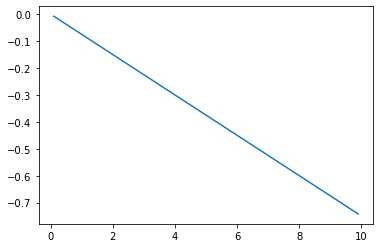

In [72]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))
plt.plot(alpha,error)

In [73]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.1,-0.007496


In [74]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-0.06531565656565715

In [75]:
# tune models GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)

In [76]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [77]:
gs.best_score_

-0.06062121212121017

In [78]:
gs.best_estimator_

RandomForestRegressor(n_estimators=250)

In [79]:
#Test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

5.369750445820605e-15

In [81]:
mean_absolute_error(y_test, tpred_lml)

0.008254175217564896

In [82]:
mean_absolute_error(y_test, tpred_rf)

0.05431043256997613